<a href="https://colab.research.google.com/github/Skidzy-hub/k-means-clustering-housholds/blob/main/Assignment1_AdvancedBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install necessary libraries (if not already installed)
!pip install scikit-learn matplotlib pandas

# Step 2: Import required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import files

In [ ]:
# Step 4: Load dataset
bathSoap_df = pd.read_csv("BathSoap.csv")

In [ ]:
# Step 5: Data Cleaning and Preprocessing
# Remove duplicate rows (if any)
bathSoap_df.drop_duplicates(inplace=True)



In [ ]:
# Step 6: Identify and Handle Non-Numeric Columns
# Identify columns that are not numeric
non_numeric_columns = bathSoap_df.select_dtypes(exclude=['number']).columns


In [ ]:
# Display the data types and the number of values in each non-numeric column
for column in non_numeric_columns:
    print(f"Column: {column}")
    print(bathSoap_df[column].value_counts(dropna=False))
    print("-----")


Column: Class
Class
Success    439
Fail       161
NaN          1
Name: count, dtype: int64
-----


In [ ]:
# Convert the non-numeric columns to numerical, errors='coerce' will replace anything that does not convert with a NaN
for col in non_numeric_columns:
    bathSoap_df[col] = pd.to_numeric(bathSoap_df[col], errors='coerce')


In [ ]:
# Identify all the numeric columns
numeric_columns = bathSoap_df.select_dtypes(include=['number']).columns


In [ ]:
# Calculate the median for the numeric columns
numeric_medians = bathSoap_df[numeric_columns].median()


In [ ]:
# Fill NaN values in numeric columns with their respective medians
bathSoap_df[numeric_columns] = bathSoap_df[numeric_columns].fillna(numeric_medians)


In [ ]:
#Verify that there are no more missing values.
print(bathSoap_df.isnull().sum())

Member id                  0
SEC                        0
FEH                        0
MT                         0
SEX                        0
AGE                        0
EDU                        0
HS                         0
CHILD                      0
CS                         0
Affluence Index            0
No. of Brands              0
Brand Runs                 0
Total Volume               0
No. of  Trans              0
Value                      0
Trans / Brand Runs         0
Vol/Tran                   0
Avg. Price                 0
Pur Vol No Promo - %       0
Pur Vol Promo 6 %          0
Pur Vol Other Promo %      0
Br. Cd. 57, 144            0
Br. Cd. 55                 0
Br. Cd. 272                0
Br. Cd. 286                0
Br. Cd. 24                 0
Br. Cd. 481                0
Br. Cd. 352                0
Br. Cd. 5                  0
Others 999                 0
Pr Cat 1                   0
Pr Cat 2                   0
Pr Cat 3                   0
Pr Cat 4      

In [ ]:
# Handle missing values by filling with median values
bathSoap_df.fillna(bathSoap_df.median(), inplace=True)

In [ ]:
# Compute maxBrandIndicator
brandIndicator_cols = bathSoap_df.columns[22:30].tolist()
bathSoap_df['maxBrandIndicator'] = bathSoap_df[brandIndicator_cols].max(axis=1)

In [ ]:
# Step 6: Define Clustering Function
def perform_kmeans_clustering(data, num_clusters=3):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    data['Cluster'] = kmeans.fit_predict(data_scaled)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data_scaled)
    data['PCA1'], data['PCA2'] = pca_result[:, 0], pca_result[:, 1]
    return data

In [ ]:
# Step 7: Perform clustering on purchase behavior
purchase_behavior_cols = bathSoap_df.columns[11:19].tolist() + ['maxBrandIndicator']
purchase_behavior_data = bathSoap_df[purchase_behavior_cols].dropna()
purchase_behavior_clusters = perform_kmeans_clustering(purchase_behavior_data, num_clusters=3)

In [ ]:
# Step 8: Perform clustering on basis for purchase
basis_purchase_cols = ['Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %',
                       'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5', 'PropCat 14']
basis_purchase_data = bathSoap_df[basis_purchase_cols].dropna()
basis_purchase_clusters = perform_kmeans_clustering(basis_purchase_data, num_clusters=3)

In [ ]:
# Step 9: Perform clustering on combined variables
combined_cols = purchase_behavior_cols + basis_purchase_cols
combined_data = bathSoap_df[combined_cols].dropna()
combined_clusters = perform_kmeans_clustering(combined_data, num_clusters=3)


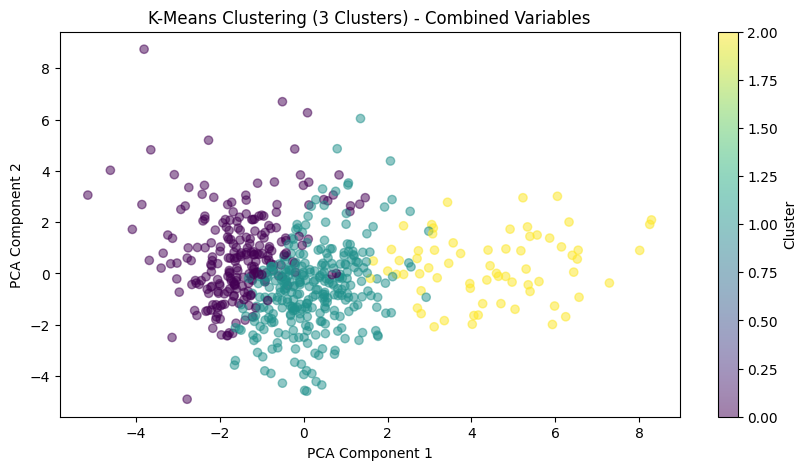

In [ ]:
# Step 10: Visualization
plt.figure(figsize=(10, 5))
plt.scatter(combined_clusters['PCA1'], combined_clusters['PCA2'], c=combined_clusters['Cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering (3 Clusters) - Combined Variables')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


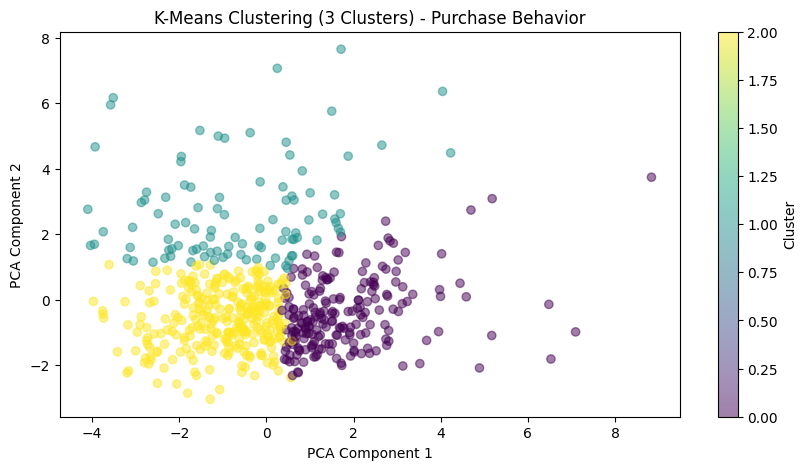

In [ ]:
# Visualization for Purchase Behavior Clustering
plt.figure(figsize=(10, 5))
plt.scatter(purchase_behavior_clusters['PCA1'], purchase_behavior_clusters['PCA2'], c=purchase_behavior_clusters['Cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering (3 Clusters) - Purchase Behavior')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


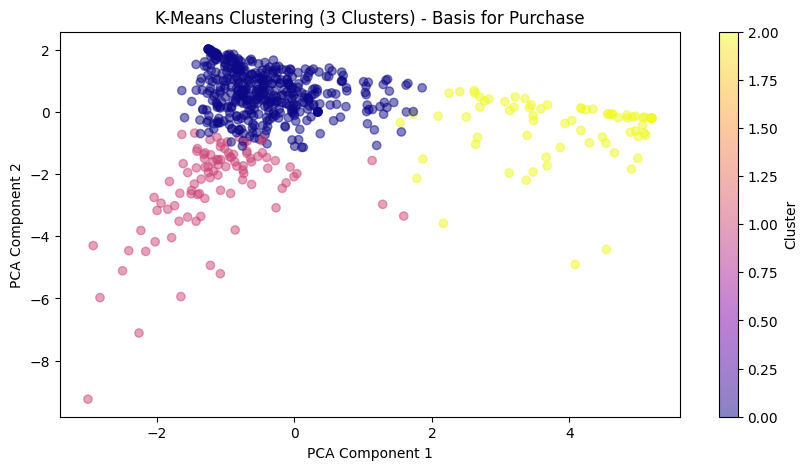

In [ ]:
# Visualization for Basis for Purchase Clustering
plt.figure(figsize=(10, 5))
plt.scatter(basis_purchase_clusters['PCA1'], basis_purchase_clusters['PCA2'], c=basis_purchase_clusters['Cluster'], cmap='plasma', alpha=0.5)
plt.title('K-Means Clustering (3 Clusters) - Basis for Purchase')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

Python Code for Logistic Regression Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import numpy as np

In [ ]:
# Define the target market segment (e.g., Cluster 1 as 'Success')
combined_clusters['Target'] = np.where(combined_clusters['Cluster'] == 1, 1, 0)  # Cluster 1 = Success, Others = 0


In [ ]:
print(combined_clusters.columns)

Index(['No. of Brands', 'Brand Runs', 'Total Volume', 'No. of  Trans', 'Value',
       'Trans / Brand Runs', 'Vol/Tran', 'Avg. Price ', 'maxBrandIndicator',
       'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %',
       'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',
       'PropCat 14', 'Cluster', 'PCA1', 'PCA2', 'Target'],
      dtype='object')


In [ ]:
# Strip whitespace from column names
combined_clusters.columns = combined_clusters.columns.str.strip()

# Define features (after stripping spaces)
features = ['No. of Trans', 'Avg. Price', 'Brand Runs', 'Total Volume', 'Value',
            'Trans / Brand Runs', 'Vol/Tran', 'Pur Vol No Promo - %',
            'Pur Vol Promo 6 %', 'Pur Vol Other Promo %']

# Check which features exist in the dataset after cleaning column names
available_features = [col for col in features if col in combined_clusters.columns]

# Select features and target
X = combined_clusters[available_features]
y = combined_clusters['Target']


In [ ]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Predict on the test set
y_pred = log_reg.predict(X_test)

In [ ]:
# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        60
           1       0.77      0.84      0.80        61

    accuracy                           0.79       121
   macro avg       0.80      0.79      0.79       121
weighted avg       0.80      0.79      0.79       121



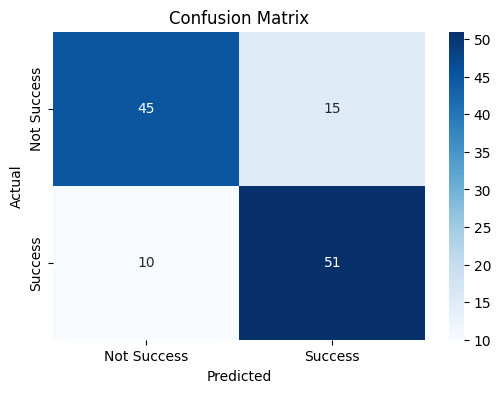

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Success', 'Success'], yticklabels=['Not Success', 'Success'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# ROC Curve
y_probs = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

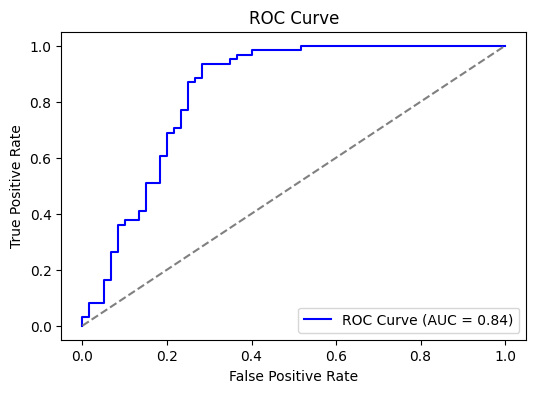

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()